# Introducción al uso de Python para sistemas de control

#### Index
1. <a href="#1.-Tabla-comparativa-de-comandos-entre-MATLAB-y-Python">Tabla comparativa de comandos entre MATLAB y Python</a>
2. <a href="#conversion-funcion-transferencia">Conversión de una función transferencia</a>
3. <a href="#raices-polinomio">Raı́ces de un polinomio</a>
4. <a href="#4.-Desarrollo-en-fracciones-simples">Desarrollo en fracciones simples</a>
5. <a href="#funcion-transferencia-lazo-cerrado">Función transferencia a lazo cerrado</a>
6. <a href="#6.-Respuesta-al-impulso">Respuesta al impulso</a>
7. <a href="#respuesta-al-escalon">Respuesta al escalón</a>
8. <a href="#8.-Respuesta-a-una-rampa-unitaria">Respuesta a una rampa unitaria</a>

## 1. Tabla comparativa de comandos entre MATLAB y Python

Observamos que se requieren las librerías `numpy`, `matplotlib.pyplot` y `scipy.signal`. Podemos usar `control` como alternativa ya que se tiene <a href="https://python-control.readthedocs.io/_/downloads/en/0.8.4/pdf/#page=95&zoom=100,96,96">Módulo de Compatibilidad MATLAB</a> accediendo con `control.matlab` (los comandos tendran un comportamiento similar).

Tener en cuenta que control utiliza la librería `numpy` y `scipy`. Y en algunas ocaciones será necesario acudir directamente a ellas.

__Recomendación:__ Utilizar la librería control.matlab en el caso de querer cierta compatibilidad de sintaxis. Se recomineda utilizar directamente las funciones de la librería control.

| MATLAB Command | Python Equivalent             | Equivalente en Python (control)  |
|----------------|-------------------------------|----------------------------------|
| exp            | numpy.exp                     |                 -                |
| sin            | numpy.sin                     |                 -                |
| cos            | numpy.cos                     |                 -                |
| sinh           | numpy.sinh                    |                 -                |
| cosh           | numpy.cosh                    |                 -                |
| clf            | matplotlib.pyplot.clf         |                 -                |
| plot           | matplotlib.pyplot.plot        |                 -                |
| subplot        | matplotlib.pyplot.subplot     |                 -                |
| hold           | matplotlib.pyplot.hold        |                 -                |
| title          | matplotlib.pyplot.title       |                 -                |
| xlabel         | matplotlib.pyplot.xlabel      |                 -                |
| ylabel         | matplotlib.pyplot.ylabel      |                 -                |
| text           | matplotlib.pyplot.text        |                 -                |
| print          | matplotlib.pyplot.savefig     |                 -                |
| figure         | matplotlib.pyplot.figure      |                 -                |
| impulse        | scipy.signal.impulse          | control.matlab.impulse           |
| step           | scipy.signal.step             | control.matlab.step              |
| tf             | scipy.signal.TransferFunction | control.TransferFunction         |
| zpk            | scipy.signal.zpk2tf           | control.matlab.zpk2tf            |
| ss2tf          | scipy.signal.ss2tf            | control.matlab.ss2tf             |
| tf2zp          | scipy.signal.tf2zpk           | control.matlab.tf2zpk            |
| ss2zp          | scipy.signal.ss2zpk           | control.matlab.ss2zpk            |
| zp2tf          | scipy.signal.zpk2tf           | control.matlab.zpk2tf            |
| tf2ss          | scipy.signal.tf2ss            | control.matlab.tf2ss             |
| zp2ss          | scipy.signal.zpk2ss           | control.matlab.zpk2ss            |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctrl
import scipy.signal as sig

## 2. <span id="conversion-funcion-transferencia">Conversión de una función transferencia _(vease Introduccion_a_Matlab_y_a_Simulink_para_Control.pdf)_</span> 
### Ejemplo 1
Supongamos la función de transferencia:
$$G(s) = \frac{5s + 20}{s^2 + 4s + 20}$$
si sacamos factor común y factorizamos:
$$G(s) = \frac{5(s + 4)}{(s + 2 - 4j)(s + 2 + 4j)}$$

Llevaremos a cabo lo mismo pero por código

#### **Ingresar polinomios**

In [2]:
# numerador
num = [5, 20]
# denominador
den = [1, 4, 20]

#### **Obtener ceros, polos y ganancia k**
Utilizamos la función `np.squeeze()` para eliminar las dimensiones dadas por numpy array (es sólo por comodidad al imprimir en pantalla).

In [3]:
z, p, k = ctrl.tf2zpk(num, den)
print("Zeros: ", np.squeeze(z))
print("Poles: ", np.squeeze(p))
print("Gain: ", k) # no es necesario utilizar np.squeeze

Zeros:  -4.0
Poles:  [-2.+4.j -2.-4.j]
Gain:  5.0


Dado que toda función transferencia dada por un cociente de polinomios se puede escribir
de la forma:
$$G(s) = k \frac{\prod_{i=1}^m (s - z_i)}{\prod_{i=1}^n (s - p_i)}$$ con $m \leq n$
Y así podemos llegar a:
$$G(s) = \frac{5(s + 4)}{(s + 2 - 4j)(s + 2 + 4j)}$$

Para realizar el procedimiento inverso, debemos ingresar los valores de z, p y k:

In [4]:
z = [-4]
p = [-2+4j, -2-4j]
k = 5

num, den = ctrl.zpk2tf(z, p, k)

print("Numerator: ", num)
print("Denominator: ", den)

Numerator:  [ 5. 20.]
Denominator:  [ 1.  4. 20.]


Aunque tengamos numerador y denominador no implica que se reconozca una función de transferencia. Por lo tanto aplicamos el comando:

In [5]:
G = ctrl.tf(num, den)
G

TransferFunction(array([ 5., 20.]), array([ 1.,  4., 20.]))

Podemos crear la misma función de transferencia a partir de los ceros, polos y ganancia:

In [6]:
G = ctrl.zpk(z, p, k)
G

TransferFunction(array([ 5., 20.]), array([ 1.,  4., 20.]))

## 3. <span id="raices-polinomio">Raı́ces de un polinomio</span>
### Ejemplo 2
Consideramos el polinomio $P = s^4 + 4s^3 + 4s^2 + s +20$. Ingresaremos el polinomio como vector:

In [7]:
p = [1, 4, 4, 1, 20]
r = np.roots(p)
r

array([-2.65449206+1.25946028j, -2.65449206-1.25946028j,
        0.65449206+1.37420805j,  0.65449206-1.37420805j])

Si queremos realizar la función inversa debemos usar `numpy.poly`

In [8]:
p = np.poly([-2.65449206+1.25946028j, -2.65449206-1.25946028j,
        0.65449206+1.37420805j,  0.65449206-1.37420805j])
p

array([ 1.        ,  4.        ,  4.00000001,  1.00000006, 20.00000001])

## 4. Desarrollo en fracciones simples
### Ejemplo 3
Supongamos que tenemos la siguiente función transferencia:
$$G(s) = \frac{16s + 16}{(s + 2)(s + 4)}$$
y que
$$R(s) = \frac{1}{s}$$

Como las raı́ces del denominador sor reales y distintas, el método de desarrollo en fracciones simples nos permite escribir a $G_{(s)} x R_{(s)}$ de la siguiente manera:
$$\frac{16s + 16}{s(s + 2)(s + 4)} = \frac{A}{s} + \frac{B}{s+2} \frac{C}{s+4}$$

Para calcular los valores de A, B y C lo hacemos mediante la fórmula de residuos, en general, estos cálculos pueden tornarse muy complicados de realizar "a mano". Podemos realizar estos cálculos de la siguiente manera:

In [9]:
num = [16, 16]
den = [1, 6, 8]
res, p, _ = sig.residue(num, den) # '_' es para descartar el vector de partes sobrantes utilizado en el proximo ejemplo

print("Residuos:", res)
print("Polos:", p)

Residuos: [-8. 24.]
Polos: [-2. -4.]


### Ejemplo 4
Si la función transferencia resulta ser _propia_, es decir que el grado del numerador es igual al del denominador, podemos añadir una parámetro más al argumento del lado izquierdo, que lo podemos llamar k. 
Supongamos que queremos hallar f (t) siendo:
$$F(s) = \frac{2s^3 + 5s^2 + 3s + 6}{s^3 + 6s^2 + 11s + 6} \Rightarrow f(t) = \mathcal{L}^{-1}\{F(s)\}$$

In [10]:
num = [2, 5, 3, 6]
den = [1, 6, 11, 6]
res, p, k = sig.residue(num, den) # k representa el término independiente

print("Residuos:", res)
print("Polos:", p)
print("Termino ind:",k)

Residuos: [ 3. -4. -6.]
Polos: [-1. -2. -3.]
Termino ind: [2.]


## 5. <span id="funcion-transferencia-lazo-cerrado">Función transferencia a lazo cerrado</span>
### Ejemplo 5
$G_1 (s) = 0.4$, $G_2 (s) = \frac{100}{s(s+2)}$, $H_2 (s) = \frac{s}{s+20}$, $H_1 (s) = 1$. Pretendemos hallar $G(s) = \frac{Y(s)}{R(s)}$ a lazo cerrado.

<img src="./Fig1-Diagrama de bloques.png" alt="Fig1"/>

Si aplicamos reducción de bloques, o resolviendo el diagrama de flujo y aplicando Mason, obtenemos:
$$G(s) = \frac{40s + 800}{s^3 + 22s^2 + 180s + 800}$$

Para calcular la función de transferencia:

#### **Definimos numeradores y denominadores de cada bloque**

In [11]:
numg1 = 0.4
numg2 = 100
numh2 = [1, 0]

deng1 = 1
deng2 = [1, 2, 0]
denh2 = [1, 20]

#### **Calculamos función de transferencia $V(s)$ a $Y(s)$**

In [12]:
# create system transfer functions
G2 = ctrl.tf(numg2, deng2)
H2 = ctrl.tf(numh2, denh2)

# perform feedback operation
sysVY = ctrl.feedback(G2, H2, sign=-1) #sign indica si es realimentación positiva o negativa (default=-1)

# extract the numerator and denominator of the closed-loop transfer function
# numvc = sysVY.num[0][0]
# denvc = sysVY.den[0][0]

print("Función de transferencia de la retroalimentación:")
print(sysVY)

Función de transferencia de la retroalimentación:

    100 s + 2000
--------------------
s^3 + 22 s^2 + 140 s



#### **Calculamos función de transferencia $E(s)$ a $Y(s)$**

In [13]:
# create system transfer functions
G1 = ctrl.tf(numg1, deng1)

# perform feedback operation
sysEY = ctrl.series(G1, sysVY)

print("Función de transferencia en serie:")
print(sysEY)

Función de transferencia en serie:

     40 s + 800
--------------------
s^3 + 22 s^2 + 140 s



#### **Por último calculamos el lazo cerrado:**

In [14]:
Gs = ctrl.feedback(sysEY) # equivalent to ctrl.feedback(sysEY, 1) and cloop in MATLAB

print("Función de transferencia en lazo cerrado:")
print(Gs)

Función de transferencia en lazo cerrado:

        40 s + 800
--------------------------
s^3 + 22 s^2 + 180 s + 800



## 6. Respuesta al impulso
### Ejemplo 6
Supongamos que tenemos una función transferencia de la siguiente forma:
$$Y(s) = \frac{1}{(s+1)(s+2)}$$

Si calculamos ahora la antitransformada, desarrollando en fracciones simples como en la <a href="#Desarrollo-en-fracciones-simples">sección 1.3 (del pdf)</a>, resulta que $y(t) = e^{−t} − e^{−2t}$.

Ingresamos los vectores numerador y denominador y luego ejecutemos el comando:

In [15]:
num = 1
den = [1, 3, 2]

sys = ctrl.tf(num,den)
print(sys)
ctrl.impulse( sys )


      1
-------------
s^2 + 3 s + 2



(array([0.        , 0.06173703, 0.11150008, 0.15108975, 0.18205861,
        0.20574409, 0.22329709, 0.23570683, 0.2438225 , 0.24837207,
        0.24997859, 0.24917443, 0.24641357, 0.2420823 , 0.23650854,
        0.22996987, 0.22270056, 0.21489757, 0.20672584, 0.19832284,
        0.18980249, 0.18125856, 0.17276764, 0.16439165, 0.15618006,
        0.14817178, 0.14039677, 0.13287748, 0.12563001, 0.11866519,
        0.11198946, 0.1056056 , 0.09951343, 0.09371033, 0.08819172,
        0.08295147, 0.07798222, 0.07327571, 0.06882297, 0.06461457,
        0.06064074, 0.05689155, 0.05335702, 0.05002721, 0.04689227,
        0.04394256, 0.04116864, 0.03856135, 0.03611182, 0.03381147,
        0.03165209, 0.02962577, 0.02772495, 0.02594241, 0.02427129,
        0.02270503, 0.02123742, 0.01986257, 0.01857489, 0.01736909,
        0.01624017, 0.01518341, 0.01419436, 0.01326881, 0.01240282,
        0.01159264, 0.01083478, 0.01012593, 0.009463  , 0.00884306,
        0.00826339, 0.0077214 , 0.0072147 , 0.00

Para ver una respuesta gráfica debemos modificar un poco más el código:

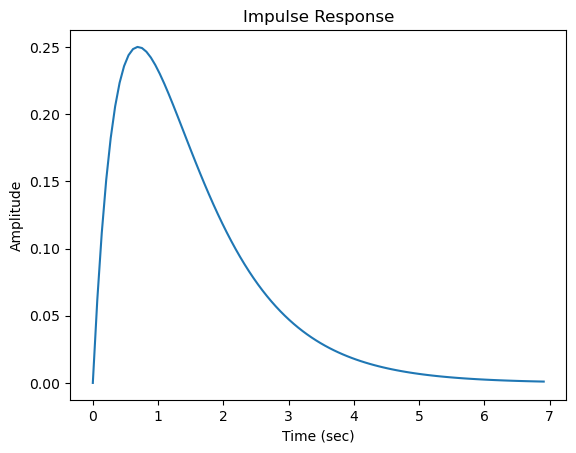

In [16]:
# agregado al código anterior:
y, t = ctrl.impulse( sys )

plt.plot(t, y)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.show()

Como podemos ver, solo nos muestra los primeros casi 7 segundos de la respuesta. Si quisiéramos que nos mostrara 12 segundos, debemos definir un vector de tiempo:

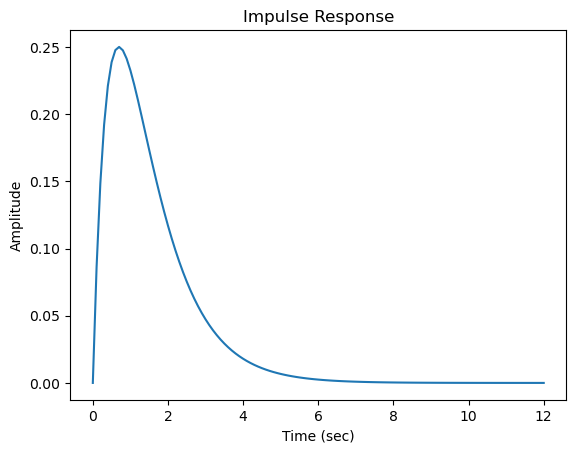

In [17]:
t = np.arange(0, 12.1, 0.1)  # np.arange(start, stop, step)
y, t = ctrl.impulse( ctrl.tf(num, den), t )  # debemos pasar de parámetro nuestro vector de tiempo

plt.plot(t, y)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.show()

Dado que la función transferencia de un sistema lineal invariante en el tiempo se define como la transformada de Laplace de la respuesta al impulso cuando todas las condiciones iniciales son nulas, comparemos el resultado obtenido con el que resultarı́a si calculáramos la respuesta temporal. Para ello utilizaremos el mismo vector temporal t, y la instrucción `f = np.exp(-t) + np.exp(-2*t)`. Ahora podemos comparar los valores obtenidos
desde la respuesta al impulso con los obtenidos desde la respuesta temporal (por ejemplo, restándolos)

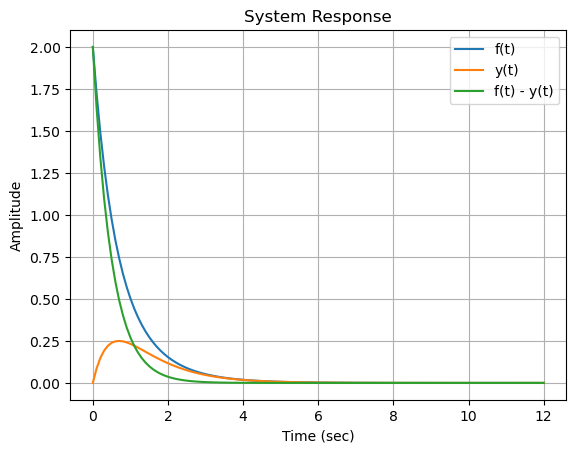

In [18]:
f = np.exp(-t) + np.exp(-2*t)

diff = f - y

plt.plot(t, f, label='f(t)')
plt.plot(t, y, label='y(t)')
plt.plot(t, diff, label='f(t) - y(t)')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('System Response')
plt.grid(True)
plt.legend()
plt.show()

## 7. <span id="respuesta-al-escalon">Respuesta al escalón</span>
### Ejemplo 7
Calculemos la respuesta al escalón unitario de la función transferencia:
$$G(s) = \frac{Y(s)}{R(s)} = \frac{4}{s^2 + 0.8s + 4}$$

Ingresamos el comando `ctrl.step()` (incluyendo `matplotlib` para respuesta gráfica)

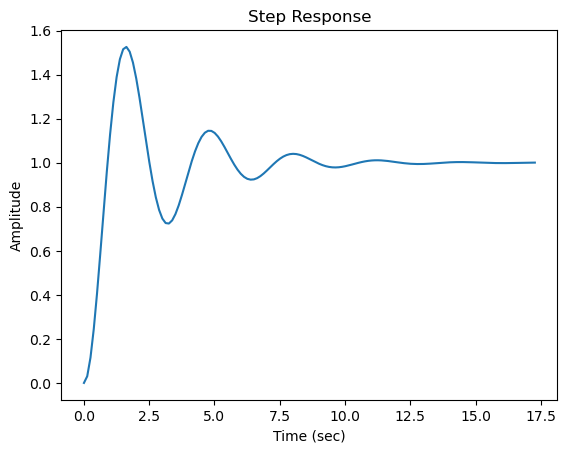

In [19]:
num = 4
den = [1, 0.8, 4]

sys = ctrl.tf(num, den)

y, t = ctrl.step(sys)

plt.plot(t, y)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.show()

## 8. Respuesta a una rampa unitaria
Para una entrada rampa unitaria no existe una función predefinida, por lo que veremos cómo con el comando step podemos obtener
una rampa. Si seguimos con el ejemplo anterior y excitamos al sistema con $r(t) = t$, es decir que $R(s) = \frac{1}{s^2}$ , tenemos lo siguiente:
$$Y(s) = (\frac{4}{s^2 + 0.8s + 4}) \frac{1}{s^2} \Rightarrow Y(s) = (\frac{4}{s^3 + 0.8s^2 + 4s}) \frac{1}{s}$$

Por lo que utilizando como denominador de la función transferencia al polinomio $s^3 +0.8s^2 + 4s$, y calculando la respuesta al escalón unitario, otenemos la respuesta a la rampa unitaria.

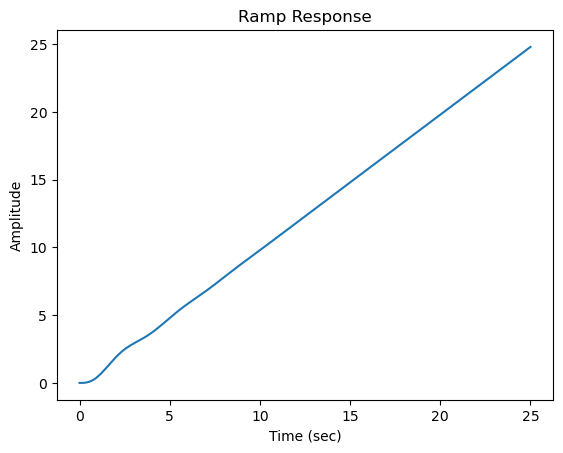

In [20]:
num = 4
den = [1, 0.8, 4, 0]

sys = ctrl.tf(num, den)

t = np.arange(0, 25.1, .1) # acotamos el tiempo a 25 sec
y, t = ctrl.step(sys, t)

plt.plot(t, y)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Ramp Response')
plt.show()